In [2]:
#importing libraries for problem 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [6]:
# Paths to CSV files
X_path = r"C:\Users\quyen\anaconda_projects\f8e8db6d-227c-4c4e-86cf-5220f324dceb\hw6_dataset\hw6_dataset\X.csv"
y_path = r"C:\Users\quyen\anaconda_projects\f8e8db6d-227c-4c4e-86cf-5220f324dceb\hw6_dataset\hw6_dataset\y.csv"

# Load CSV files
X = pd.read_csv(X_path, header=None).values  # 128 features
y = pd.read_csv(y_path, header=None).values.ravel()  # labels as 1D array

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 128)
y shape: (10000,)


In [7]:
class_names = ['plane','car','bird','horse','ship']
y_labels = np.array([class_names[label] for label in y])


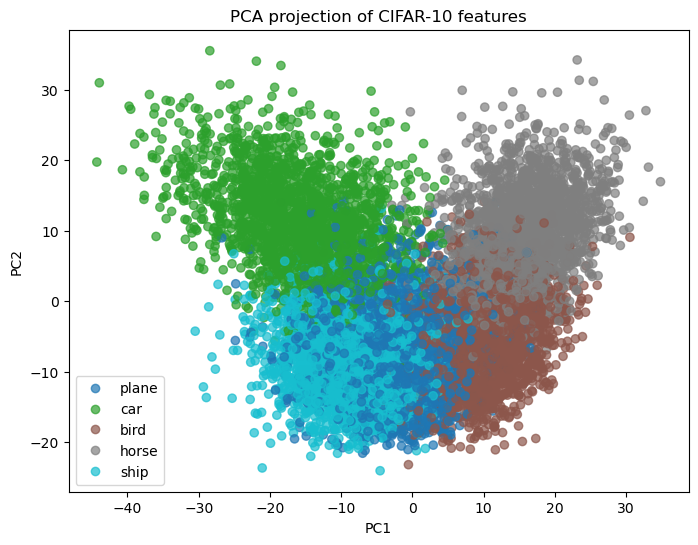

In [8]:
# Part a PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', alpha=0.7)
plt.title("PCA projection of CIFAR-10 features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()


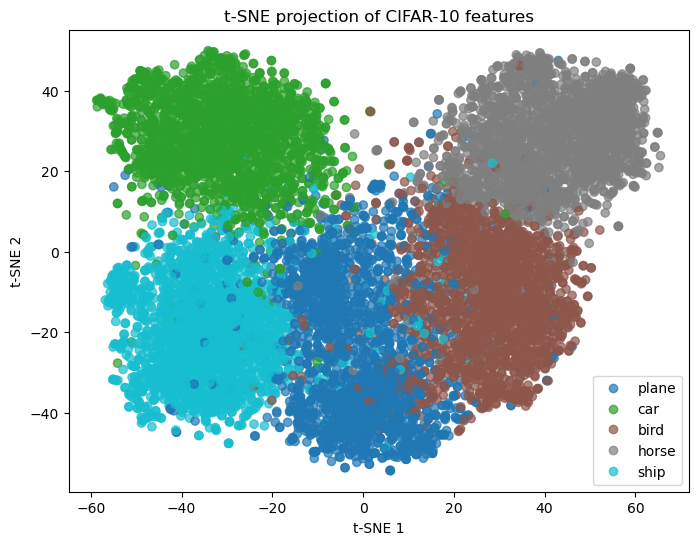

In [9]:
#Part b t-SNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab10', alpha=0.7)
plt.title("t-SNE projection of CIFAR-10 features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()


In [11]:
#importing libraries for problem 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [12]:
images_path = r"C:\Users\quyen\anaconda_projects\f8e8db6d-227c-4c4e-86cf-5220f324dceb\hw6_dataset\hw6_dataset\images.csv"
images = pd.read_csv(images_path, header=None).values  # 10k rows x 3072 columns


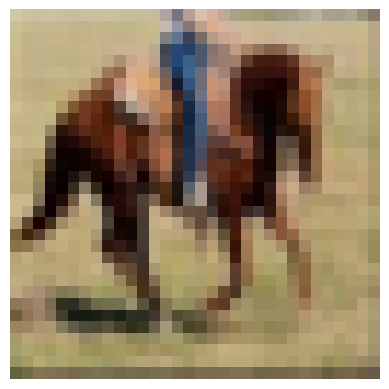

In [13]:
img = images[0].reshape(32,32,3)
plt.imshow(img)
plt.axis('off')
plt.show()


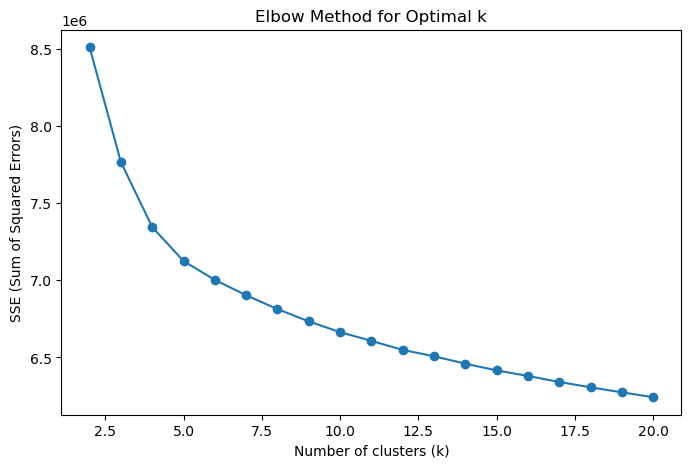

In [14]:
sse = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # SSE

# Plot SSE vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [15]:
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)


Average silhouette score: 0.082


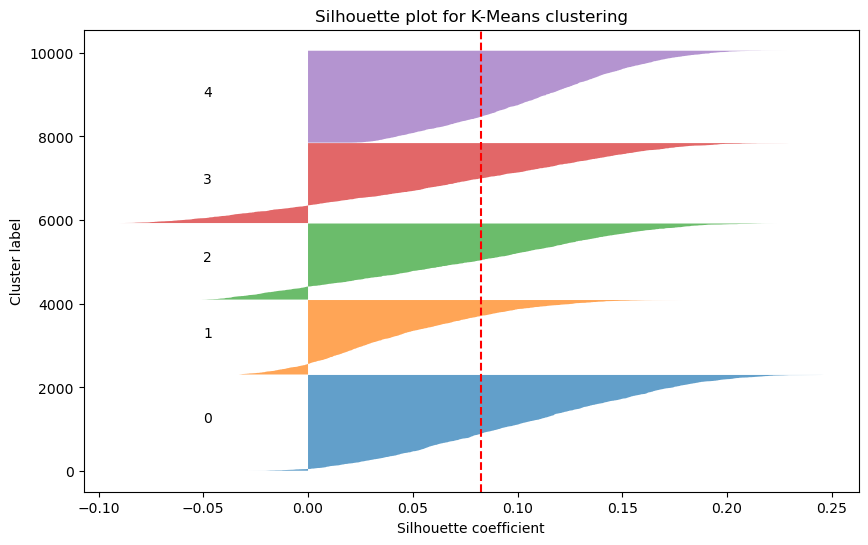

In [16]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Average silhouette score: {silhouette_avg:.3f}")

# Silhouette coefficients for each sample
sil_values = silhouette_samples(X, cluster_labels)

# Plot silhouette
plt.figure(figsize=(10,6))
y_lower = 10
for i in range(k_opt):
    ith_cluster_sil = sil_values[cluster_labels == i]
    ith_cluster_sil.sort()
    size_cluster = ith_cluster_sil.shape[0]
    y_upper = y_lower + size_cluster
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5*size_cluster, str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for K-Means clustering")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


In [17]:
core_samples = []
boundary_samples = []

for i in range(k_opt):
    cluster_sil = sil_values[cluster_labels == i]
    cluster_indices = np.where(cluster_labels == i)[0]
    
    # 5 samples at the core (largest silhouette)
    core_idx = cluster_indices[np.argsort(cluster_sil)[-5:]]
    core_samples.extend(core_idx)
    
# 2 samples at boundaries (smallest silhouette across all clusters)
boundary_idx = np.argsort(sil_values)[:2]
boundary_samples.extend(boundary_idx)

print("Core sample indices:", core_samples)
print("Boundary sample indices:", boundary_samples)


Core sample indices: [np.int64(5964), np.int64(6819), np.int64(1803), np.int64(56), np.int64(7353), np.int64(8002), np.int64(4849), np.int64(3818), np.int64(2222), np.int64(1685), np.int64(8143), np.int64(7673), np.int64(8528), np.int64(4989), np.int64(3337), np.int64(2899), np.int64(3856), np.int64(2449), np.int64(6340), np.int64(9953), np.int64(1224), np.int64(2609), np.int64(6306), np.int64(7521), np.int64(4013)]
Boundary sample indices: [np.int64(1371), np.int64(8292)]


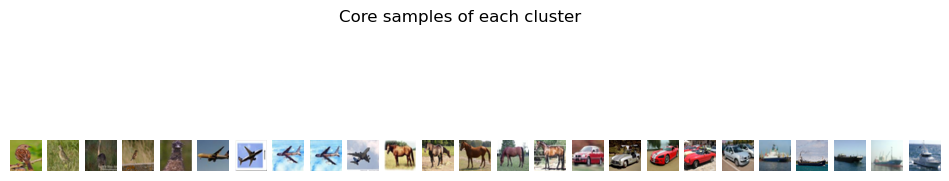

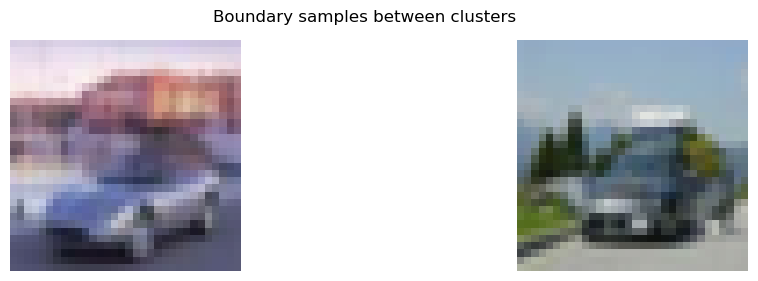

In [18]:
def show_images(indices, title):
    plt.figure(figsize=(12,3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        plt.imshow(images[idx].reshape(32,32,3))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(core_samples, "Core samples of each cluster")
show_images(boundary_samples, "Boundary samples between clusters")


Shape after PCA to 20D: (10000, 20)


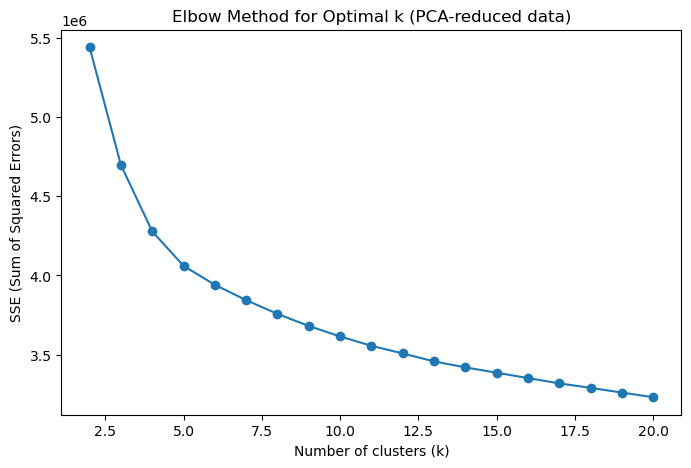

Average silhouette score (20D PCA): 0.143


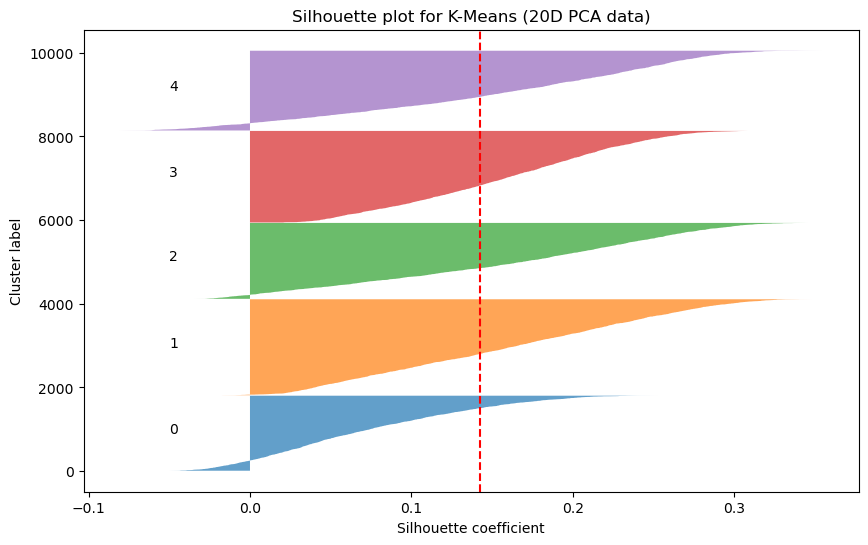

In [19]:
#problem 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load dataset
X_path = r"C:\Users\quyen\anaconda_projects\f8e8db6d-227c-4c4e-86cf-5220f324dceb\hw6_dataset\hw6_dataset\X.csv"
X = pd.read_csv(X_path, header=None).values  # 128 features

# --- Step a: PCA to 20 dimensions ---
pca_20 = PCA(n_components=20, random_state=42)
X_pca20 = pca_20.fit_transform(X)
print("Shape after PCA to 20D:", X_pca20.shape)

# --- Step b: K-Means clustering and SSE (Elbow method) ---
sse = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca20)
    sse.append(kmeans.inertia_)

# Plot SSE vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal k (PCA-reduced data)")
plt.show()

# --- Step c: K-Means with optimal k and silhouette analysis ---
k_opt = 5  # select based on elbow plot
kmeans_20 = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
cluster_labels_20 = kmeans_20.fit_predict(X_pca20)

# Silhouette analysis
silhouette_avg = silhouette_score(X_pca20, cluster_labels_20)
print(f"Average silhouette score (20D PCA): {silhouette_avg:.3f}")

sil_values = silhouette_samples(X_pca20, cluster_labels_20)

# Silhouette plot
plt.figure(figsize=(10,6))
y_lower = 10
for i in range(k_opt):
    ith_cluster_sil = sil_values[cluster_labels_20 == i]
    ith_cluster_sil.sort()
    size_cluster = ith_cluster_sil.shape[0]
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5*size_cluster, str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for K-Means (20D PCA data)")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


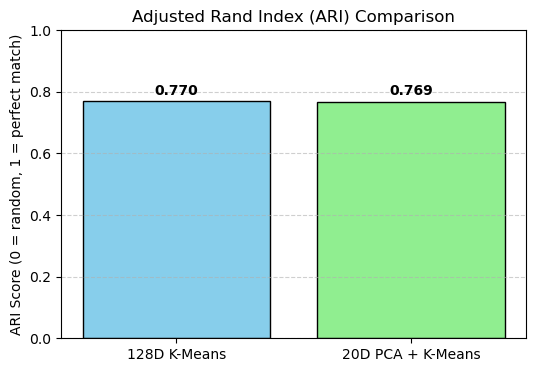

In [21]:
#problem 4

import matplotlib.pyplot as plt
import numpy as np

# ARI values from your results (these come from the adjusted_rand_score above)
ari_values = [ari_orig, ari_pca20]
methods = ['128D K-Means', '20D PCA + K-Means']

# Create a simple bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(methods, ari_values, color=['skyblue', 'lightgreen'], edgecolor='black')

# Add the numeric ARI values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Adjusted Rand Index (ARI) Comparison")
plt.ylabel("ARI Score (0 = random, 1 = perfect match)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



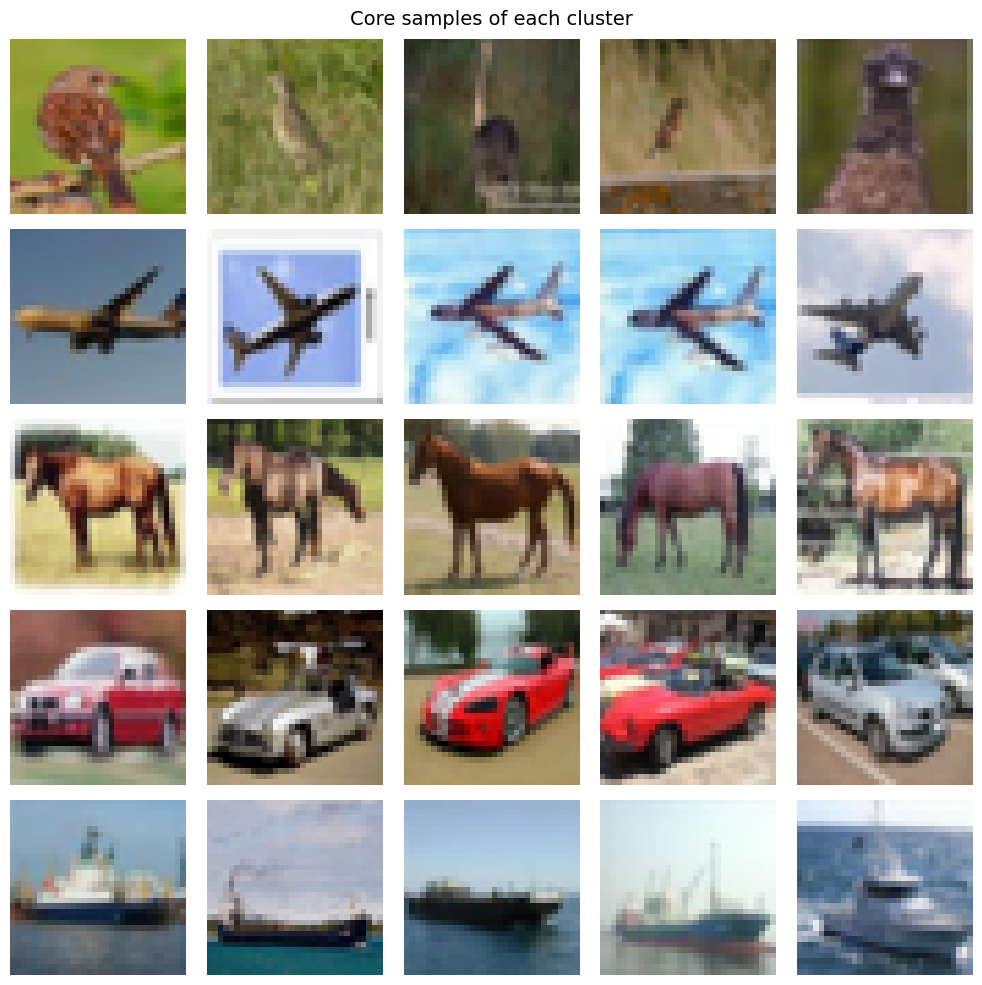

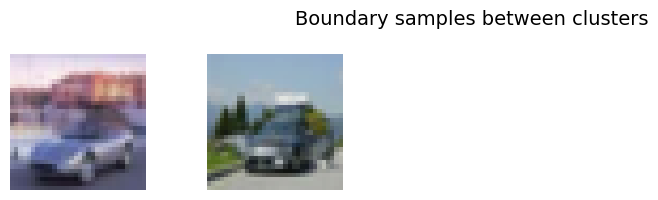

In [22]:
import math
import matplotlib.pyplot as plt

def show_images(indices, title, images_per_row=5):
    n_images = len(indices)
    n_rows = math.ceil(n_images / images_per_row)
    
    plt.figure(figsize=(images_per_row * 2, n_rows * 2))
    
    for i, idx in enumerate(indices):
        plt.subplot(n_rows, images_per_row, i + 1)
        plt.imshow(images[idx].reshape(32, 32, 3))
        plt.axis('off')
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

show_images(core_samples, "Core samples of each cluster")
show_images(boundary_samples, "Boundary samples between clusters")
